<a href="https://colab.research.google.com/github/seoljincheol/Machine-Learning/blob/main/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(1~4%EC%9E%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 혼자 공부하는 머신러닝

## 1. 마켓과 머신러닝
* K-최근접 이웃 알고리즘

In [ ]:
# 생선분류문제

# bream(도미)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# smelt(빙어)
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

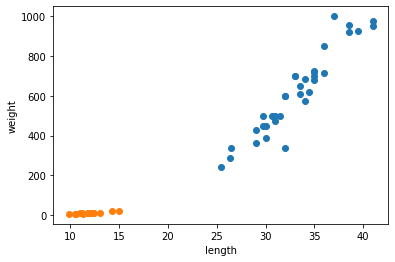

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(length, weight)]
len(fish_data)

49

In [ ]:
fish_target = [1]*35 + [0]*14
len(fish_target)

49

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

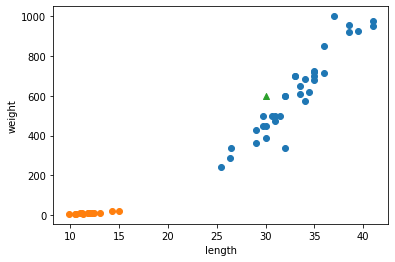

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^') # 해당 데이터는 어디로 분류할까?
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.predict([[30, 600]]) # length:30, weight:600
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# n_neighbors 값을 49로 조정 (default = 5)
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

#print(35/49) 총 49마리 중 35개(bream이 데이터의 대다수인 35마리인데, n_neighbors=49로 조정시 bream만 맞춤)

0.7142857142857143

In [ ]:
# accuracy가 1이 아닐 때의 n, score
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    kn.n_neighbors = n
    score = kn.score(fish_data, fish_target)
    if score < 1:
        print(' n_neighbors:{}\n score:{}'.format(n,score))
        break

 n_neighbors:18
 score:0.9795918367346939


# 2. 데이터 다루기

In [ ]:
import numpy as np

In [ ]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

input_arr.shape

(49, 2)

In [ ]:
fish_data[:2]

[[25.4, 242.0], [26.3, 290.0]]

In [ ]:
fish_target[:2]

[1, 1]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
input_arr[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [ ]:
target_arr[:5]

array([1, 1, 1, 1, 1])

In [ ]:
# 데이터 랜덤으로 섞기
np.random.seed(42) # 랜덤시드 고정
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
# train_test_split
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [ ]:
train_input[1:5]

array([[ 12.4,  13.4],
       [ 14.3,  19.7],
       [ 12.2,  12.2],
       [ 33. , 700. ]])

In [ ]:
train_target[1:5]

array([0, 0, 0, 1])

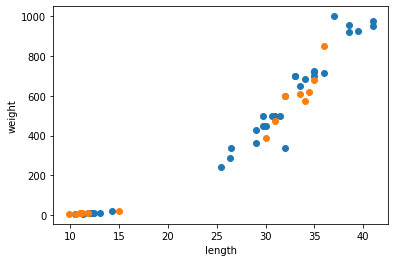

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# blue:train, orange:test

In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.5714285714285714

# 2-2. 데이터 전처리 _ 스케일이 다른 데이터 전처리 (1/16)

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

In [ ]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [ ]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

tip: 데이터가 클수록 파이썬 리스트보다 넘파이 배열을 사용하는 것이 효율적임

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(36, 2) (13, 2) (36,) (13,)


In [ ]:
print(test_target)
# 도미(1)-10개, 빙어(0)-3개, 샘플링 편향 현상 발생 > stratify로 수정하기

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


수상한 도미 한 마리 [25, 150]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

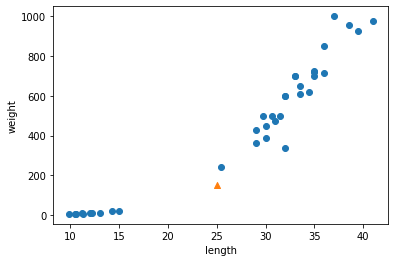

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])

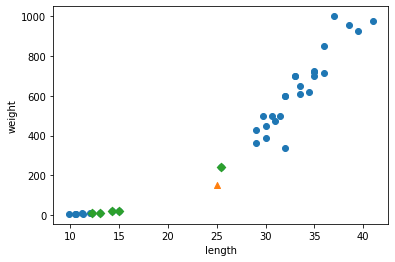

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(train_input[indexes])
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


기준을 맞추기

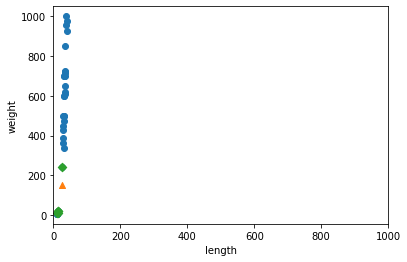

In [ ]:
# x축 범위를 0~1000 으로 y축 범위처럼 맞춰줌
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
# 표준점수 산출
train_scaled = (train_input - mean) / std

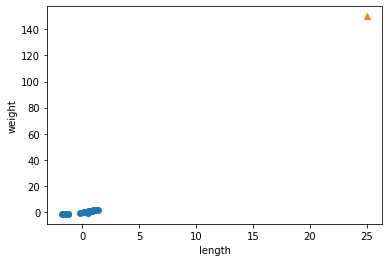

In [ ]:
# 변환값1 > 부자연스러움
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

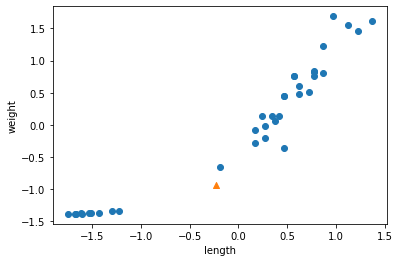

In [ ]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

트레인셋은 평균과 표준편차를 이용해서 변경함, 테스트셋도 같은 수식을 적용해야 함.

In [ ]:
test_scaled = (test_input - mean) / std

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new])) # 1(도미)로 예측함

[1.]


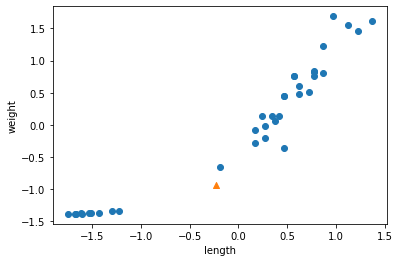

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
#plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 3. 회귀 알고리즘과 모델 규제

### 3-1. k-최근접 이웃회귀 

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

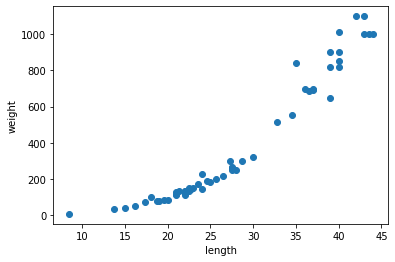

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(test_target)

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


사이킷런 훈련셋 준비를 위해 2차원 배열로 만들기

In [ ]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [ ]:
# (4,1) ==> (2,2) 배열 변환
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [ ]:
# reshape 에서 -1 은 나머지 원소로 채우라는 의미
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


결정계수 (R**2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target)) # 결정계수

0.9928094061010639


In [ ]:
from sklearn.metrics import mean_absolute_error # 타깃과 예측의 절대값 오차를 평균하여 반환
# 테스트셋 예측
test_prediction = knr.predict(test_input)
# 평균절대값오차 산출
mae = mean_absolute_error(test_target, test_prediction)
print(mae) # 19g 정도 차이

19.157142857142862


과대적합 / 과소적합

In [ ]:
print(knr.score(train_input, train_target)) # train_score
print(knr.score(test_input, test_target)) # test_score
# train_score(0.96), test_score(0.99) ==> 과소적합

0.9698823289099255
0.9928094061010639


In [ ]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target)) 

0.9804899950518966
0.974645996398761


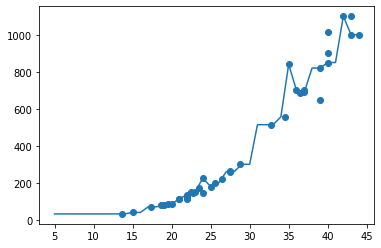

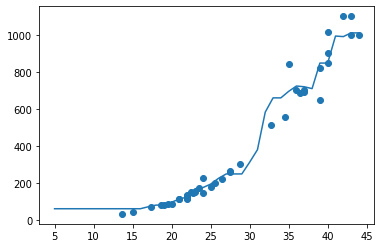

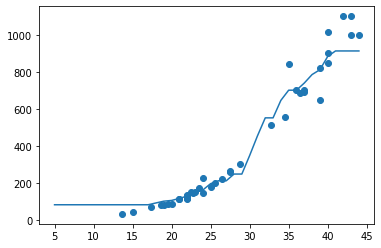

In [ ]:
# 확인문제
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

for n in [1,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)

    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.show()

### 3-2. 선형 회귀

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]])) # length=50cm, weight=???

[1033.33333333]


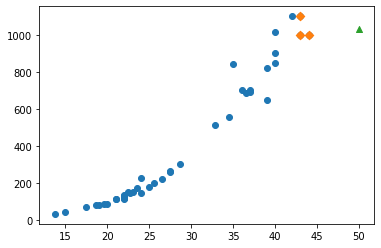

In [ ]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]]) # length=50cm 이웃 구하기
plt.scatter(train_input, train_target)      # 훈련셋 산점도
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 훈련셋 중 이웃
plt.scatter(50, 1033, marker='^')           # length=50cm 표시
plt.show()

In [ ]:
print(np.mean(train_target[indexes])) # 이웃 샘플의 타겟값 평균

1033.3333333333333


In [ ]:
print(knr.predict([[100]]))  # 이웃 샘플의 평균값 영향으로 이상치 분석에 한계

[1033.33333333]


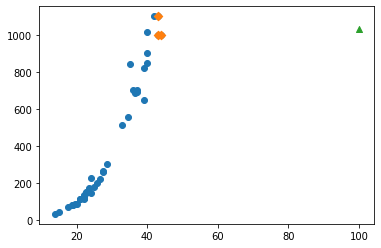

In [ ]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]]) # length=50cm 이웃 구하기
plt.scatter(train_input, train_target)      # 훈련셋 산점도
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 훈련셋 중 이웃
plt.scatter(100, 1033, marker='^')           # length=100cm 표시
plt.show()

선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
print(lr.coef_, lr.intercept_) #coef: 기울기, 계수, intercept: 절편

[39.01714496] -709.0186449535477


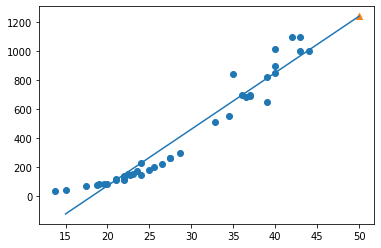

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([15,50],[15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.scatter(50, 1241, marker='^')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


다항회귀

In [ ]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


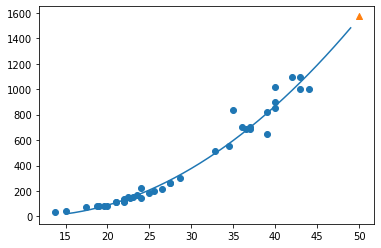

In [ ]:
point = np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter([50],[1574],marker='^')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


### 3-3. 특성공학과 규제 (1/17)

다중회귀

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

In [ ]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
test_poly = poly.transform(test_input)

다중회귀모델

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


In [ ]:
poly = PolynomialFeatures(degree = 5, include_bias=False) # 특성에 5제곱
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)  # 55개 feature

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # test 과대적합

0.9999999999991096
-144.40579242335605


규제

In [ ]:
# 표준점수로 변환한 train, test 준비
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

릿지: 계수를 제곱한 값으로 규제 (L2 규제)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


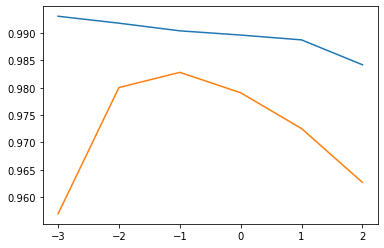

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)  # 10배씩 늘린 alpha값을 일정하게 표현하기 위해 log10
plt.plot(np.log10(alpha_list), test_score)
plt.show() # blue:train, orange:test

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


라쏘: 계수의 절대값으로 규제 (L1 규제)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


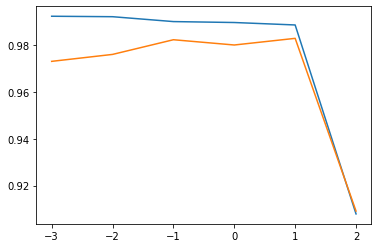

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)  # max_iter: 반복하는 계산수, 
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)  # 10배씩 늘린 alpha값을 일정하게 표현하기 위해 log10
plt.plot(np.log10(alpha_list), test_score)
plt.show() # blue:train, orange:test

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0)) # 55개 특성 중에 40개 = 0, 15개 특성만 사용함

40


# 4. 다양한 분류 알고리즘

### 04-1. 로지스틱 회귀

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()
print(fish_input[:3])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]]


In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

K-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(train_scaled.shape)
print(train_target.shape)
print(test_scaled.shape)
print(test_target.shape)

(119, 5)
(119, 1)
(40, 5)
(40, 1)


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) # predict_proba: 클래스별 확률값
print(np.round(proba, decimals=4))        # decimals: 소수점 자리수

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
# 네번째 샘플의 최근접 이웃은?
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[[['Roach']
  ['Perch']
  ['Perch']]]


로지스틱회귀

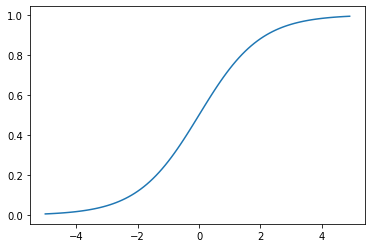

In [ ]:
# 시그모이드 함수(=로지스틱 함수) 그래프
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1) # -5부터 5까지 0.1 간격
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)
plt.show()

로지스틱회귀로 이진분류

In [ ]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

In [ ]:
bream_smelt_indexes.shape

(119, 1)

In [ ]:
train_scaled.shape

(119, 5)

In [ ]:
# train_bream_smelt = train_scaled[bream_smelt_indexes] ..... 차원이 달라서 실행 오류 발생 (119,1) (119,5)
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

In [ ]:
print("[처음 5개 샘플 예측]")
print(lr.predict(train_bream_smelt[:5]))   
print("\n[처음 5개 예측 확률]")
print(lr.predict_proba(train_bream_smelt[:5]))
print("\n[Bream:0, Smelt:1]")
print(lr.classes_)
print("\n[기울기와 절편]")
print(lr.coef_, lr.intercept_)

In [ ]:
# 로지스틱 회귀 방정식 추출값으로 z 계산
decisions = lr.dicision_function(train_bream_smelt[:5])
print(decisions)

In [ ]:
# z 값을 시그모이드 함수에 통과시켜 확률 계산 (양성 클래스의 z 반환)
from scipy.special import expit
print(expit(decisions))

로지스틱회귀로 다중분류

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


* 5개의 특성을 사용해 7개의 target 값 확률을 계산함, 클래스마다 7 개의 z 값
* 이진분류: 시그모이드 함수로 0 < z < 1
* 다중분류: 소프트맥스 함수로 전체 확률을 1로 압축해 변환(정규화된 지수함수)

In [ ]:
# z1 ~ z7 확률
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
# softmax
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


### 4-2. 확률적 경사 하강법
* 훈련세트의 샘플을 꺼내서 점진적으로 학습하는 과정
* 샘플의 수: 1개(확률적), 여러개(미니배치), 모두(배치)
* Loss function = cost function (미분 가능해야 함-연속값)
* epoch: 전체 샘플을 모두 사용하는 반복 횟수

로지스틱 손실함수
* 양성클래스의 예측확률에 (-)변환. 
* 로그함수를 통해 양성(target=1): -log(예측확률), 음성(target=0): -log(1-예측확률)
* 이진분류 : logistic loss function
* 다중분류 : cross-entropy loss function

SGD Classifier

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
# 표준화 전처리(특성값의 스케일을 맞추기)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# SGDClassifier 는 훈련셋에서 한 개씩 샘플을 꺼내 경사하강법 수행함
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=10, random_state=42) #ConvergenceWarning: 모델이 충분히 수렴하지 않음. max_iter 값을 늘려주기
sgd.fit(train_scaled, train_target)
print(sgd.score(train_scaled, train_target))
print(sgd.score(test_scaled, test_target))

0.773109243697479
0.775


In [ ]:
sgd.partial_fit(train_scaled, train_target)  # partial_fit: 모델을 이어서 훈련
print(sgd.score(train_scaled, train_target))
print(sgd.score(test_scaled, test_target))

0.8151260504201681
0.825


에포크와 과대/과소적합

In [ ]:
import numpy as np
sgd = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sgd.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sgd.score(train_scaled, train_target))
    test_score.append(sgd.score(test_scaled, test_target))

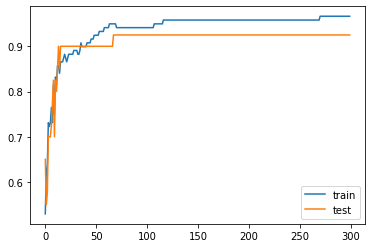

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.legend()
plt.show()
# 100회 정도가 적합

In [ ]:
sgd = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) # tol: 향상될 최소값, None은 강제수행
sgd.fit(train_scaled, train_target)
print(sgd.score(train_scaled, train_target))
print(sgd.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
 # loss의 기본값: hinge(= 서포트 벡터 머신)
sgd = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sgd.fit(train_scaled, train_target)
print(sgd.score(train_scaled, train_target))
print(sgd.score(test_scaled, test_target))

0.9495798319327731
0.925
